In [6]:
# -------------------------------
# BLOQUE DE EDA INICIAL
# -------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# --- 1. Cargar  CSV ---
df = pd.read_csv("C:/Users/juana/Desktop/liquideuda_project/datasets_clean/merged_registradores.csv")


ANALISIS EXPLORATORIO EDA

In [11]:
# --- Validar promedio de concursos por periodo ---
contest_cols = ["t_voluntario", "t_necesario", "t_consecutivo"]

# Agrupar por año y trimestre
df_periodo = df.groupby(["año", "trimestre"])[contest_cols].mean().reset_index()

# Mostrar los promedios
print("Promedio de concursos por trimestre y año:")
print(df_periodo)

# También puedes ver los totales para comparar
df_totales = df.groupby(["año", "trimestre"])[contest_cols].sum().reset_index()
print("\nTotales de concursos por trimestre y año:")
print(df_totales)


Promedio de concursos por trimestre y año:
     año  trimestre  t_voluntario  t_necesario  t_consecutivo
0   2021          1     35.897959     0.489796      34.387755
1   2021          2     33.795918     0.469388      33.346939
2   2021          3     24.061224     0.224490      26.000000
3   2021          4     30.673469     0.122449      34.673469
4   2022          1     35.244898     0.285714      38.142857
5   2022          2     33.857143     0.244898      38.551020
6   2022          3     47.081633     0.714286      35.367347
7   2022          4    103.673469     1.244898      39.122449
8   2023          1    114.918367     0.959184      15.183673
9   2023          2    178.571429     0.836735      13.346939
10  2023          3    147.918367     0.714286       6.734694
11  2023          4    200.020408     0.959184       5.367347
12  2024          1    156.367347     0.775510       2.306122
13  2024          2    184.938776     1.000000       1.938776
14  2024          3    188.

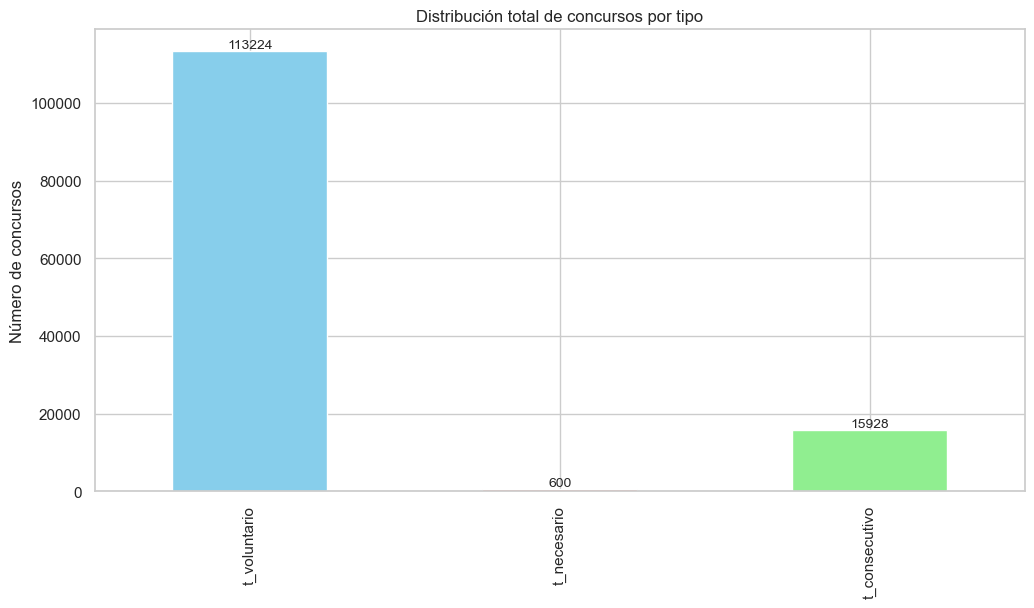

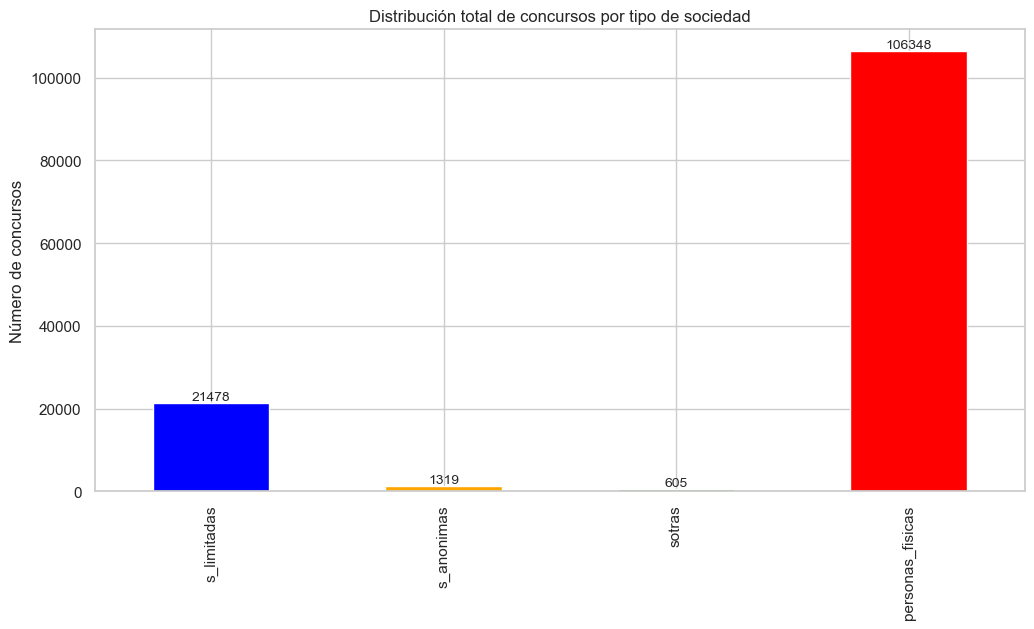

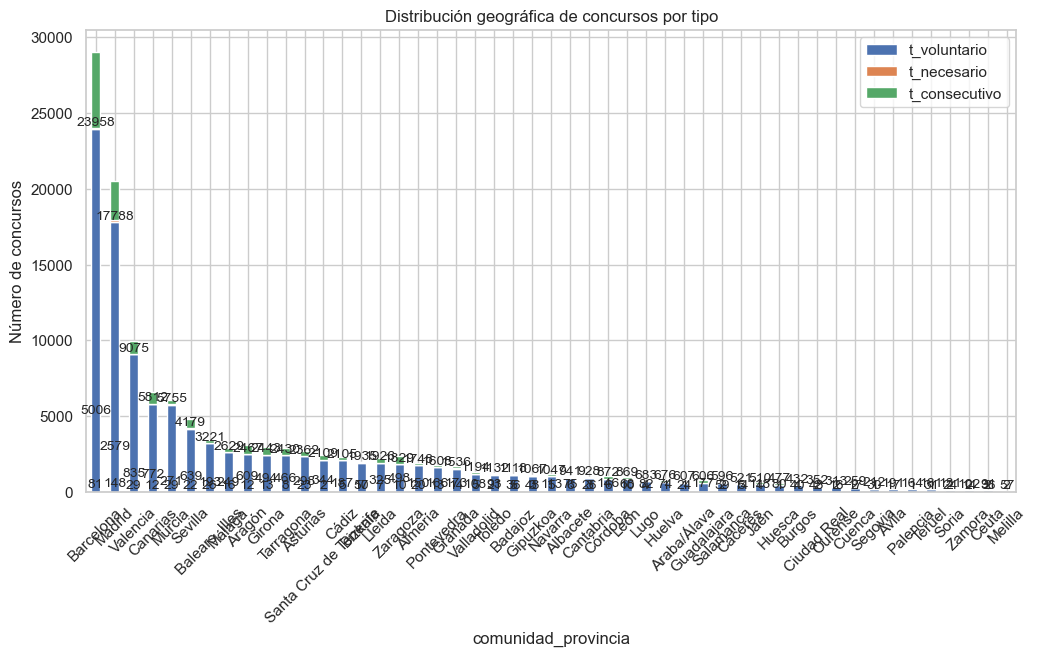

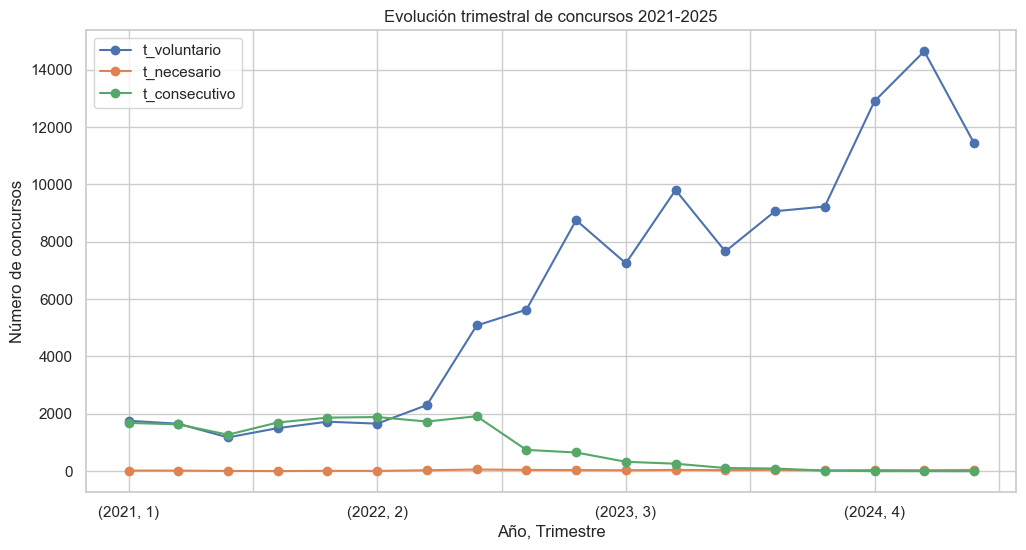

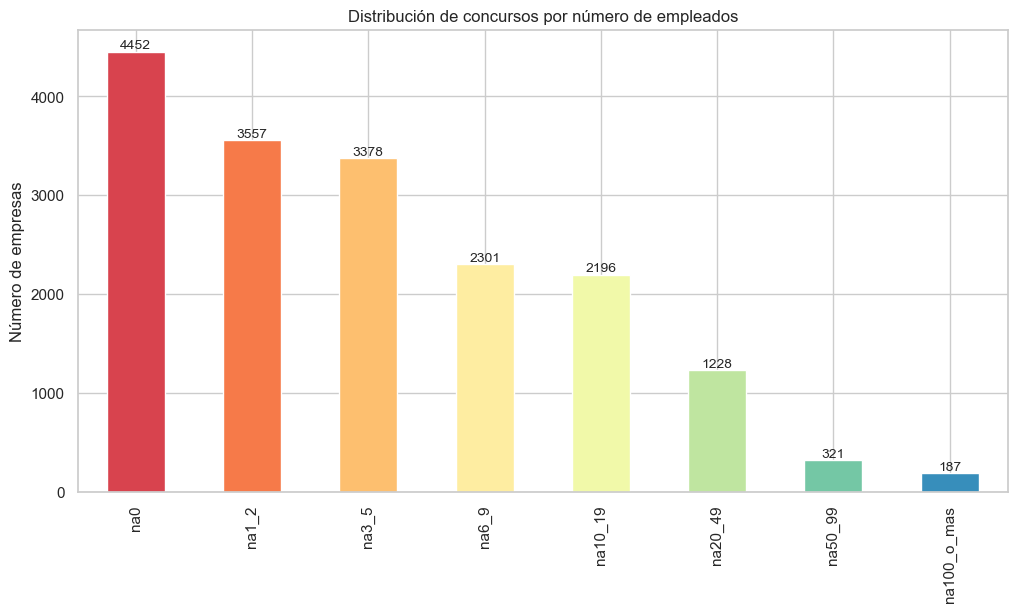

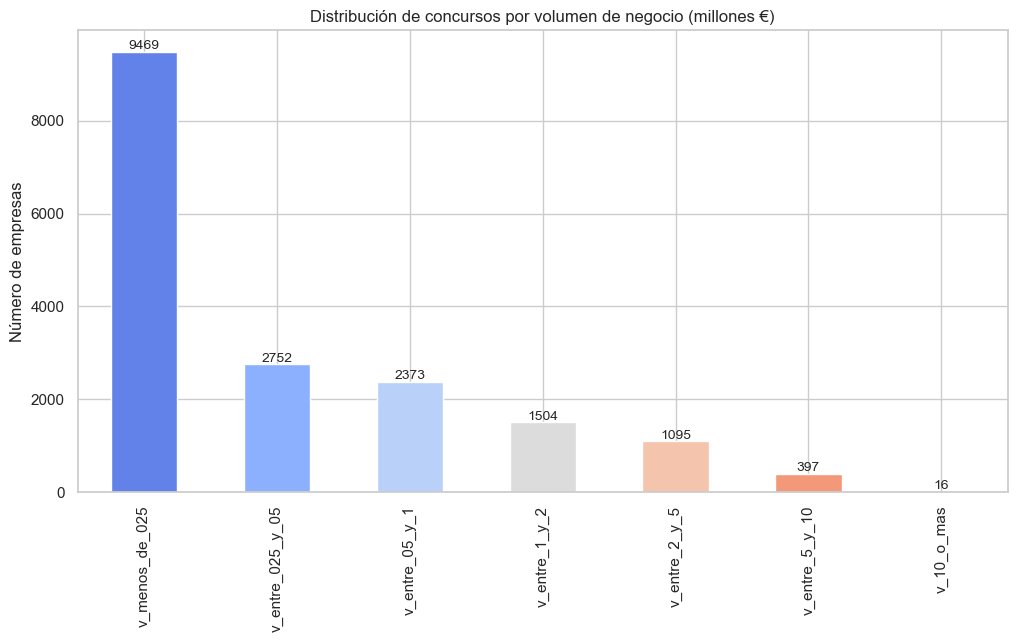

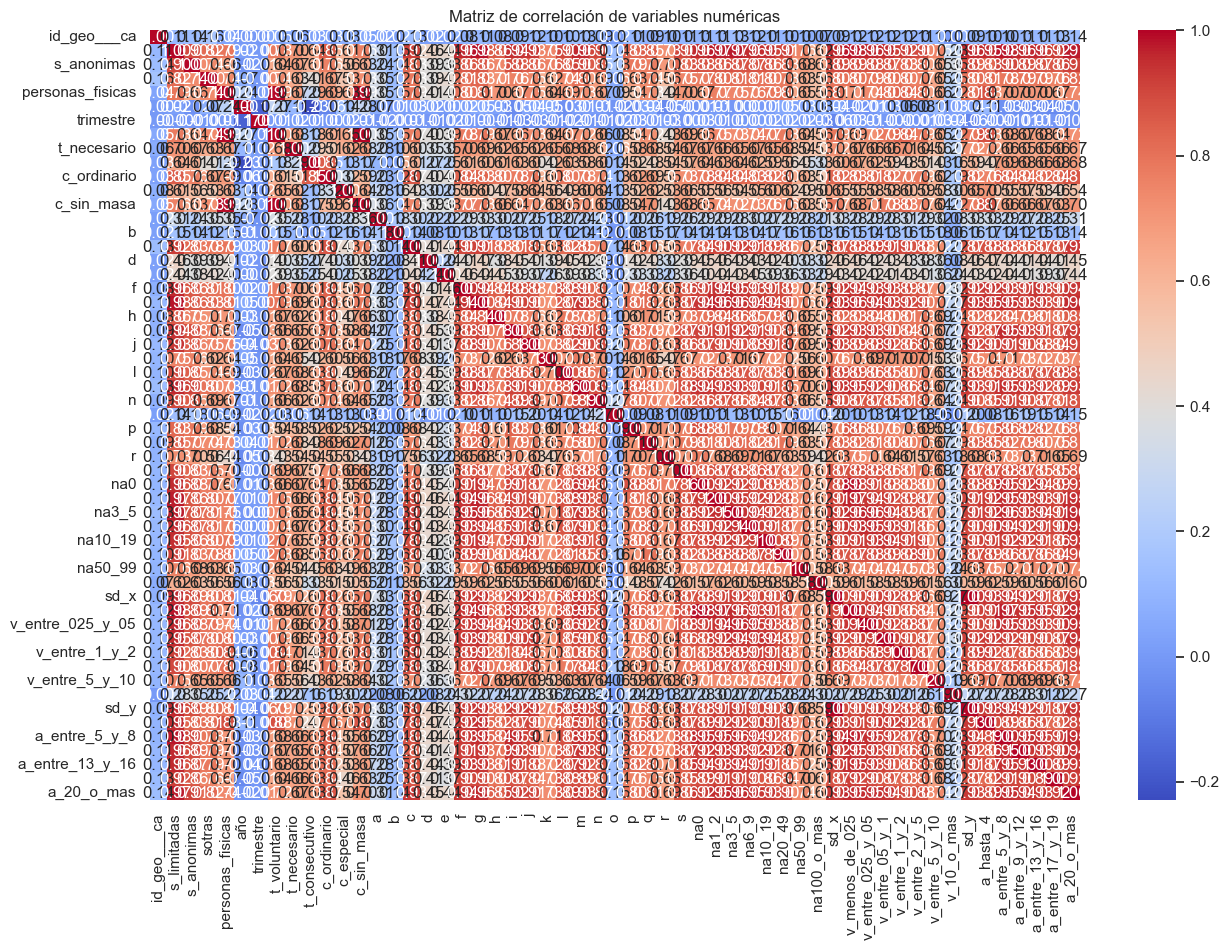

In [13]:
# Configuración gráfica
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Función para mostrar valores en las barras
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Solo mostrar valores positivos
            ax.annotate(f'{int(height)}', 
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10)

# -------------------------------
# Distribución de concursos por tipo
# -------------------------------
contest_cols = ["t_voluntario", "t_necesario", "t_consecutivo"]
ax = df[contest_cols].sum().plot(kind="bar", color=["skyblue", "salmon", "lightgreen"])
plt.title("Distribución total de concursos por tipo")
plt.ylabel("Número de concursos")
add_labels(ax)
plt.show()

# -------------------------------
# Distribución por tipo de sociedad
# -------------------------------
society_cols = ["s_limitadas", "s_anonimas", "sotras", "personas_fisicas"]
ax = df[society_cols].sum().plot(kind="bar", color=["blue", "orange", "green", "red"])
plt.title("Distribución total de concursos por tipo de sociedad")
plt.ylabel("Número de concursos")
add_labels(ax)
plt.show()

# -------------------------------
# Distribución geográfica de concursos
# -------------------------------
df_geo = df.groupby("comunidad_provincia")[contest_cols].sum().sort_values("t_voluntario", ascending=False)
ax = df_geo[contest_cols].plot(kind="bar", stacked=True)
plt.title("Distribución geográfica de concursos por tipo")
plt.ylabel("Número de concursos")
plt.xticks(rotation=45)
add_labels(ax)
plt.show()

# -------------------------------
# Evolución temporal de concursos
# -------------------------------
df_time = df.groupby(["año", "trimestre"])[contest_cols].sum()
ax = df_time.plot(marker="o")
plt.title("Evolución trimestral de concursos 2021-2025")
plt.ylabel("Número de concursos")
plt.xlabel("Año, Trimestre")
plt.show()

# -------------------------------
# Distribución por empleados
# -------------------------------
employee_cols = ["na0","na1_2","na3_5","na6_9","na10_19","na20_49","na50_99","na100_o_mas"]
ax = df[employee_cols].sum().plot(kind="bar", color=sns.color_palette("Spectral", len(employee_cols)))
plt.title("Distribución de concursos por número de empleados")
plt.ylabel("Número de empresas")
add_labels(ax)
plt.show()

# -------------------------------
# Distribución por volumen de negocio
# -------------------------------
volume_cols = ["v_menos_de_025","v_entre_025_y_05","v_entre_05_y_1","v_entre_1_y_2",
               "v_entre_2_y_5","v_entre_5_y_10","v_10_o_mas"]
ax = df[volume_cols].sum().plot(kind="bar", color=sns.color_palette("coolwarm", len(volume_cols)))
plt.title("Distribución de concursos por volumen de negocio (millones €)")
plt.ylabel("Número de empresas")
add_labels(ax)
plt.show()

# -------------------------------
# Correlación entre variables numéricas
# -------------------------------
plt.figure(figsize=(15,10))
num_cols = df.select_dtypes(include="number").columns
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables numéricas")
plt.show()